<a href="https://colab.research.google.com/github/Abdullah2020/Car-Price-Prediction-in-Nigeria-using-ML/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Regression - Fresh Auto Car Price Prediction**

Import the necessary libraries

In [1]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:

    !pip install catboost
    !pip install ipywidgets
    !jupyter nbextension enable --py widgetsnbextension

    print('Environment: Google Colab')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.3 MB/s 
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Environment: Google Colab


In [2]:
import pandas as pd
import numpy as np                            #mathematical operation
import matplotlib.pyplot as plt               #data visualisation
import seaborn as sns                         #data visualisation
%matplotlib


from sklearn.ensemble import RandomForestRegressor        #used for Random forest modeling
from catboost import CatBoostRegressor                    #used for CatBoost modelling
from sklearn.ensemble import GradientBoostingRegressor    #for Gradient
from sklearn.linear_model import LinearRegression         #used for linear regression model
from sklearn.model_selection import train_test_split       #used for splitting dataset into training and testing df

#metrics 
from sklearn.metrics import mean_absolute_error            #used for cal. MAE
from sklearn.preprocessing import MinMaxScaler             #used for normalising dataset into a common scale using Min and Max.
from sklearn.metrics import mean_squared_error            #used for Residual Sum of Squares(RSS)
from sklearn.metrics import r2_score                      #used for R- Squares

#Penalisation Methods
from sklearn.linear_model import Ridge                    #used for L2 Regularisation
from sklearn.linear_model import Lasso                    #used for LASSO 

print('Setup Completed!')

Using matplotlib backend: agg
Setup Completed!


In [3]:
car_df = pd.read_csv("/content/cars.csv")

**Let know our dataset**

In [4]:
car_df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [5]:
car_df.tail()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"
7204,VHL15246,Abuja,Honda,Accord Crosstour,"2,012",Gray,3.38,Nigerian Used,"83,308"


In [6]:
print("There are {} rows and {} columns in the dataset.".format(car_df.shape[0], car_df.shape[1]))


There are 7205 rows and 9 columns in the dataset.


In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [8]:
car_df.describe()

,Amount (Million Naira)
count,7188.000000
mean,11.847999
std,25.318922
min,0.450000
25%,3.500000
50%,5.650000
75%,11.662500
max,456.000000


In [9]:
car_df.dtypes

VehicleID                  object
Location                   object
Maker                      object
Model                      object
Year                       object
Colour                     object
Amount (Million Naira)    float64
Type                       object
Distance                   object
dtype: object

In [10]:
car_df.nunique()

VehicleID                 5141
Location                     3
Maker                       55
Model                     1223
Year                        33
Colour                      21
Amount (Million Naira)     742
Type                         3
Distance                  3144
dtype: int64

In [11]:
car_df.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [12]:
#display the missing values with percentage

missing_values = pd.DataFrame({'Count':car_df.isna().sum(),'Percentage':car_df.isna().sum()/len(car_df)*100})
missing_values

,Count,Percentage
VehicleID,0,0.000000
Location,0,0.000000
Maker,0,0.000000
Model,0,0.000000
Year,21,0.291464
Colour,0,0.000000
Amount (Million Naira),17,0.235947
Type,197,2.734212
Distance,2360,32.755031


**Data preprocessing**

In [13]:
car_df["Distance"]

0           NaN
1       125,000
2       110,852
3        30,000
4       125,206
         ...   
7200     65,000
7201    200,000
7202        NaN
7203     85,750
7204     83,308
Name: Distance, Length: 7205, dtype: object

In [14]:
car_df["Year"]

0       2,011
1       2,012
2       2,010
3       2,017
4       2,002
        ...  
7200    2,018
7201    2,007
7202    2,010
7203    2,012
7204    2,012
Name: Year, Length: 7205, dtype: object

Removing comman within numbers

In [15]:
#remove comma 
car_df["Distance"] = car_df.Distance.str.replace(",", "")

car_df["Year"] = car_df.Year.str.replace(",", "")

Handling missing values

In [16]:
#Step2:

#fill the columns with median values
car_df["Year"].fillna(car_df["Year"].median(), inplace=True)     
car_df["Amount (Million Naira)"].fillna(car_df["Amount (Million Naira)"].median(), inplace=True)
car_df["Distance"].fillna(car_df["Distance"].median(), inplace = True)

# #fill the column with forward fill
car_df["Type"].fillna(method = "ffill", inplace = True)


In [17]:
missing_values = pd.DataFrame({'Count':car_df.isna().sum(),'Percentage':car_df.isna().sum()/len(car_df)*100})
missing_values

,Count,Percentage
VehicleID,0,0.0
Location,0,0.0
Maker,0,0.0
Model,0,0.0
Year,0,0.0
Colour,0,0.0
Amount (Million Naira),0,0.0
Type,0,0.0
Distance,0,0.0


In [18]:
car_df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,80830.0
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206


Convert Distance and Year columns from object to int and float

In [19]:
car_df['Distance'] = car_df.Distance.astype(float)
car_df['Year'] = car_df.Year.astype(int)

In [20]:
#let confirm our operation

car_df.dtypes

VehicleID                  object
Location                   object
Maker                      object
Model                      object
Year                        int64
Colour                     object
Amount (Million Naira)    float64
Type                       object
Distance                  float64
dtype: object

Drop some irrelevant columns

In [21]:
car_df.drop(["VehicleID", "Location"], axis = 1, inplace=True)

In [22]:
car_df

,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Honda,Accord Coupe EX V-6,2011,Silver,2.20,Nigerian Used,80830.0
1,Hyundai,Sonata,2012,Silver,3.50,Nigerian Used,125000.0
2,Lexus,RX 350,2010,Red,9.20,Foreign Used,110852.0
3,Mercedes-Benz,GLE-Class,2017,Blue,22.80,Foreign Used,30000.0
4,Toyota,Highlander,2002,Red,2.60,Nigerian Used,125206.0
...,...,...,...,...,...,...,...
7200,Honda,Civic,2018,Gray,5.70,Foreign Used,65000.0
7201,BMW,X3,2007,White,4.00,Nigerian Used,200000.0
7202,Toyota,RAV4 2.5 Limited 4x4,2010,Black,2.85,Nigerian Used,80830.0
7203,Mercedes-Benz,GLK-Class 350,2012,Black,8.65,Foreign Used,85750.0


In [23]:
#correction matric


correl = car_df.corr()

plt.figure(figsize = (20,18))
sns.heatmap(correl, annot=True, cmap= "RdYlGn")
plt.show()

**MODELLING**

Let display the categorical and numerical columns

In [24]:
cat_cols = car_df.select_dtypes(include = ["object", "category"]).columns

numer_cols = [col for col in car_df.columns if col not in cat_cols]

print('The Columns with categorical values are ', cat_cols)

print()
print("-"*100)
print()

print('The Columns with Numerical values are ', numer_cols)

The Columns with categorical values are  Index(['Maker', 'Model', 'Colour', 'Type'], dtype='object')

----------------------------------------------------------------------------------------------------

The Columns with Numerical values are  ['Year', 'Amount (Million Naira)', 'Distance']


Implement Label encoding on categorical columns

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_cols:
  car_df[i] = le.fit_transform(car_df[i])

In [26]:
car_df.head()

,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,17,117,2011,16,2.2,2,80830.0
1,19,1049,2012,16,3.5,2,125000.0
2,29,908,2010,15,9.2,1,110852.0
3,34,508,2017,2,22.8,1,30000.0
4,52,569,2002,15,2.6,2,125206.0


Now we have a clean dataset for modeling and ML processes.

We will be using four Algo to 

In [27]:
#splitting the data into X and y

x = car_df.drop('Amount (Million Naira)', axis = 1)

y = car_df["Amount (Million Naira)"]

In [28]:
#splitting data into train = 80% and test = 20%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


Let create Hyper-functions

In [29]:
#putting the models in a dictionary

models = {"Randomforest": RandomForestRegressor(),"catboost":CatBoostRegressor(),
          "gradientboost": GradientBoostingRegressor(), "linearRegressor": LinearRegression()}


def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)

    #making a dictionary to keep model scores
    model_scores = {}

    #looping through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [30]:
%%time

scores = fit_and_score(models = models, 
                       x_train = x_train, x_test = x_test,
                       y_train = y_train, y_test = y_test)

scores

Learning rate set to 0.053998
0:	learn: 24.3548574	total: 48.6ms	remaining: 48.5s
1:	learn: 23.7273094	total: 50.7ms	remaining: 25.3s
2:	learn: 23.1702016	total: 52.9ms	remaining: 17.6s
3:	learn: 22.5998034	total: 54.9ms	remaining: 13.7s
4:	learn: 22.0729039	total: 57ms	remaining: 11.3s
5:	learn: 21.5896351	total: 58.8ms	remaining: 9.73s
6:	learn: 21.1578760	total: 63.9ms	remaining: 9.06s
7:	learn: 20.7036019	total: 66.4ms	remaining: 8.23s
8:	learn: 20.3297402	total: 71.9ms	remaining: 7.91s
9:	learn: 19.9634334	total: 76.2ms	remaining: 7.54s
10:	learn: 19.5988025	total: 78.2ms	remaining: 7.03s
11:	learn: 19.2914077	total: 80.3ms	remaining: 6.61s
12:	learn: 18.9788321	total: 82.4ms	remaining: 6.25s
13:	learn: 18.6773854	total: 84.4ms	remaining: 5.94s
14:	learn: 18.4066661	total: 86.6ms	remaining: 5.68s
15:	learn: 18.1689555	total: 88.6ms	remaining: 5.45s
16:	learn: 17.8991048	total: 90.5ms	remaining: 5.23s
17:	learn: 17.6464212	total: 92.4ms	remaining: 5.04s
18:	learn: 17.4180626	total:

{'Randomforest': 0.8162250910942752,
 'catboost': 0.89425726778697,
 'gradientboost': 0.8531185729407293,
 'linearRegressor': 0.22120796684113297}

In [31]:
scores

{'Randomforest': 0.8162250910942752,
 'catboost': 0.89425726778697,
 'gradientboost': 0.8531185729407293,
 'linearRegressor': 0.22120796684113297}

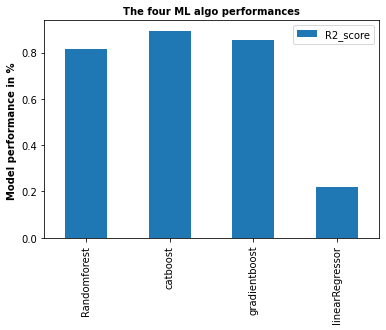

In [32]:
#Let visualise the four models
%matplotlib inline

compare = pd.DataFrame(scores, index = ["R2_score"])
compare.T.plot.bar()
plt.ylabel('Model performance in % ',fontsize=10, fontweight='bold')
plt.title('The four ML algo performances',fontsize=10, fontweight='bold')
plt.show()

As seen above, catboost has the best model output. Thus, we will be using catboost for our prediction model

In [33]:
#By implementing catboost algo, we follow the following steps

#Step1: define the algo
cbt = CatBoostRegressor()

#Step2: fit the model
cbt.fit(x_train, y_train)

Learning rate set to 0.053998
0:	learn: 24.3548574	total: 3.42ms	remaining: 3.42s
1:	learn: 23.7273094	total: 5.65ms	remaining: 2.82s
2:	learn: 23.1702016	total: 13.5ms	remaining: 4.47s
3:	learn: 22.5998034	total: 21.1ms	remaining: 5.26s
4:	learn: 22.0729039	total: 29.4ms	remaining: 5.85s
5:	learn: 21.5896351	total: 39.9ms	remaining: 6.61s
6:	learn: 21.1578760	total: 49.5ms	remaining: 7.03s
7:	learn: 20.7036019	total: 54ms	remaining: 6.69s
8:	learn: 20.3297402	total: 59ms	remaining: 6.5s
9:	learn: 19.9634334	total: 65.9ms	remaining: 6.52s
10:	learn: 19.5988025	total: 72.6ms	remaining: 6.53s
11:	learn: 19.2914077	total: 76.9ms	remaining: 6.33s
12:	learn: 18.9788321	total: 82.1ms	remaining: 6.23s
13:	learn: 18.6773854	total: 89.5ms	remaining: 6.3s
14:	learn: 18.4066661	total: 93.7ms	remaining: 6.15s
15:	learn: 18.1689555	total: 101ms	remaining: 6.2s
16:	learn: 17.8991048	total: 105ms	remaining: 6.09s
17:	learn: 17.6464212	total: 115ms	remaining: 6.29s
18:	learn: 17.4180626	total: 123ms	r

In [45]:
print("The model accuracy is: ", round(cbt.score(x_test, y_test) * 100),2, "%")


The model accuracy is:  89 2 %


In [35]:
#Step3: make prediction

y_preds = cbt.predict(x_test)
print(y_preds)

[ 8.14612526 11.61828667 50.46700965 ...  1.73783662  8.81311366
  4.69141303]


Let display a dataframe between actual price and predicted price

In [36]:
new_df = pd.DataFrame(data= {"Actual Price": y_test, "Predicted Price": y_preds})

new_df.head(10)

,Actual Price,Predicted Price
3252,6.50,8.146125
1535,16.00,11.618287
6337,56.00,50.467010
177,2.59,3.434963
230,25.00,23.514944
2627,7.30,10.140805
5111,7.50,10.474584
6064,132.00,57.535493
3341,3.10,6.829735
748,11.00,11.355885


In [37]:
#let add a new columns to new_df to display the diff between Predicted price and actual price

column_data = y_preds - y_test
new_df1 = new_df.assign(Diff = column_data)

new_df1

,Actual Price,Predicted Price,Diff
3252,6.50,8.146125,1.646125
1535,16.00,11.618287,-4.381713
6337,56.00,50.467010,-5.532990
177,2.59,3.434963,0.844963
230,25.00,23.514944,-1.485056
...,...,...,...
5230,18.00,27.183761,9.183761
6476,7.40,7.112217,-0.287783
4949,2.00,1.737837,-0.262163
1886,3.90,8.813114,4.913114


The above algo seems to predict pretty well. However, we can use our metrics to validate our catboost algo

In [38]:
from sklearn import metrics 

print("MAE: ", metrics.mean_absolute_error(y_test, y_preds))
print("MSE: ", metrics.mean_squared_error(y_test, y_preds))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

MAE:  2.9119757137643303
MSE:  74.66636313054269
RMSE:  8.640970034119011


In [51]:
accuracy = r2_score(y_test, y_preds)

print('R2-SCORE: ', round(accuracy,3)*100, "%")

R2-SCORE:  89.4 %
